# Author: Vishal Singhania
Task No: 3
Exploratory Data Analysis on Retail Sales Dataset


#GRIPDEC 20 

# Importing the Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Understanding the Data

In [3]:
# Stats on Numerical Features
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
a = df.dtypes[df.dtypes == "object"].index

In [6]:
# Stats on Categorical Features
df[a].describe()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [7]:
# Checking on Null Values in Entire DataFrame
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# Duplicate Rows
df.duplicated().sum()

17

In [9]:
#remove the duplicate data
df.drop_duplicates(inplace=True)

In [11]:
# The Countries column has a single country i.e.USA thus we can drop it
df.drop('Country', inplace = True, axis = 1)

# EDA and Visualizations

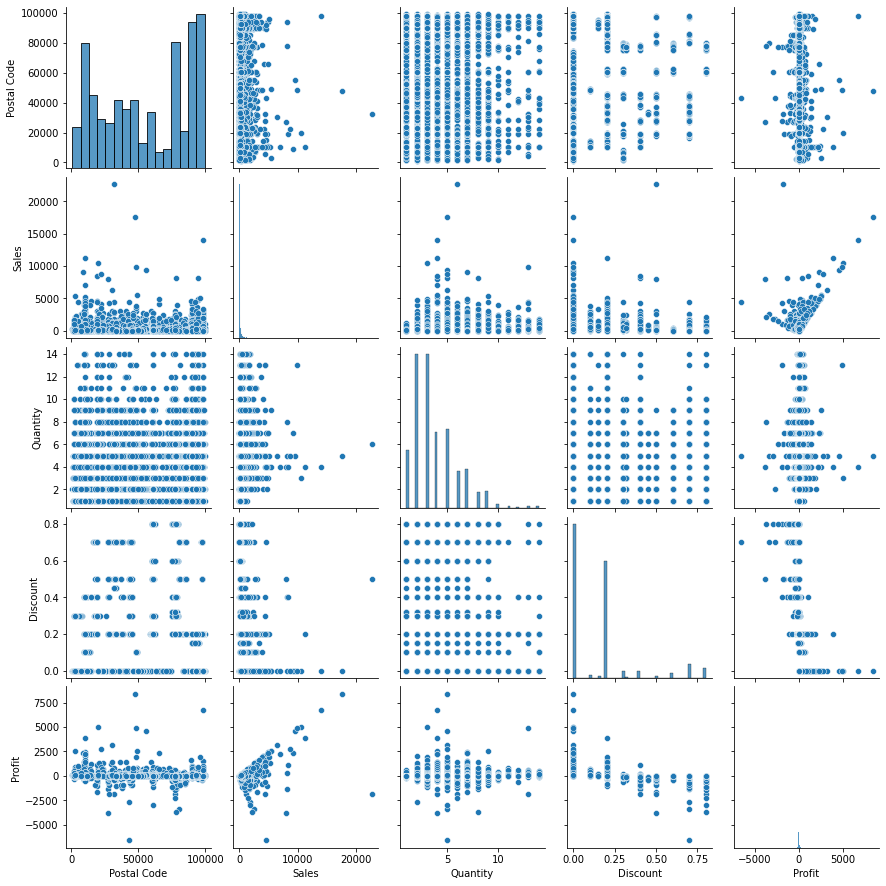

In [12]:
# Univariate and Multivariate Analysis to check distribution of the data for further handling
sns.pairplot(df)

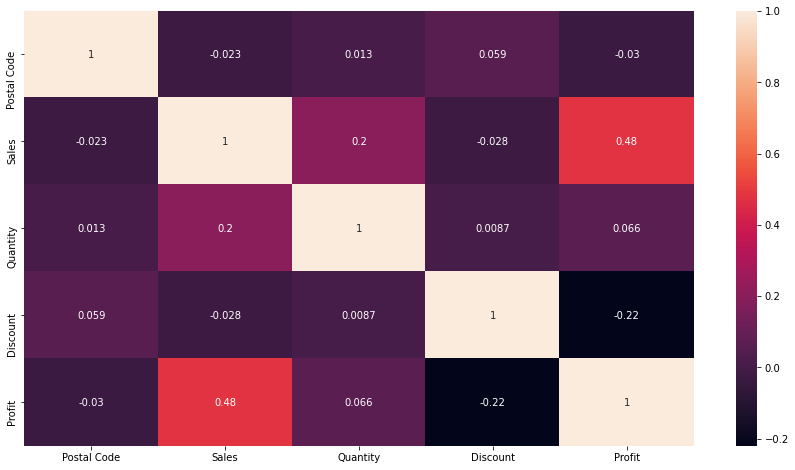

In [13]:
#heatmap to check the correlation of the dataset
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

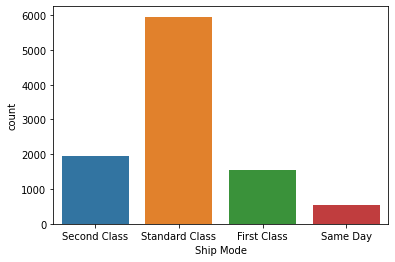

In [14]:
sns.countplot(x="Ship Mode",data=df)
plt.show()

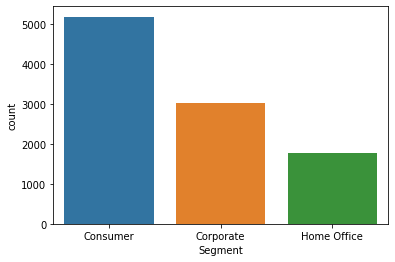

In [15]:
sns.countplot(x="Segment",data=df)
plt.show()

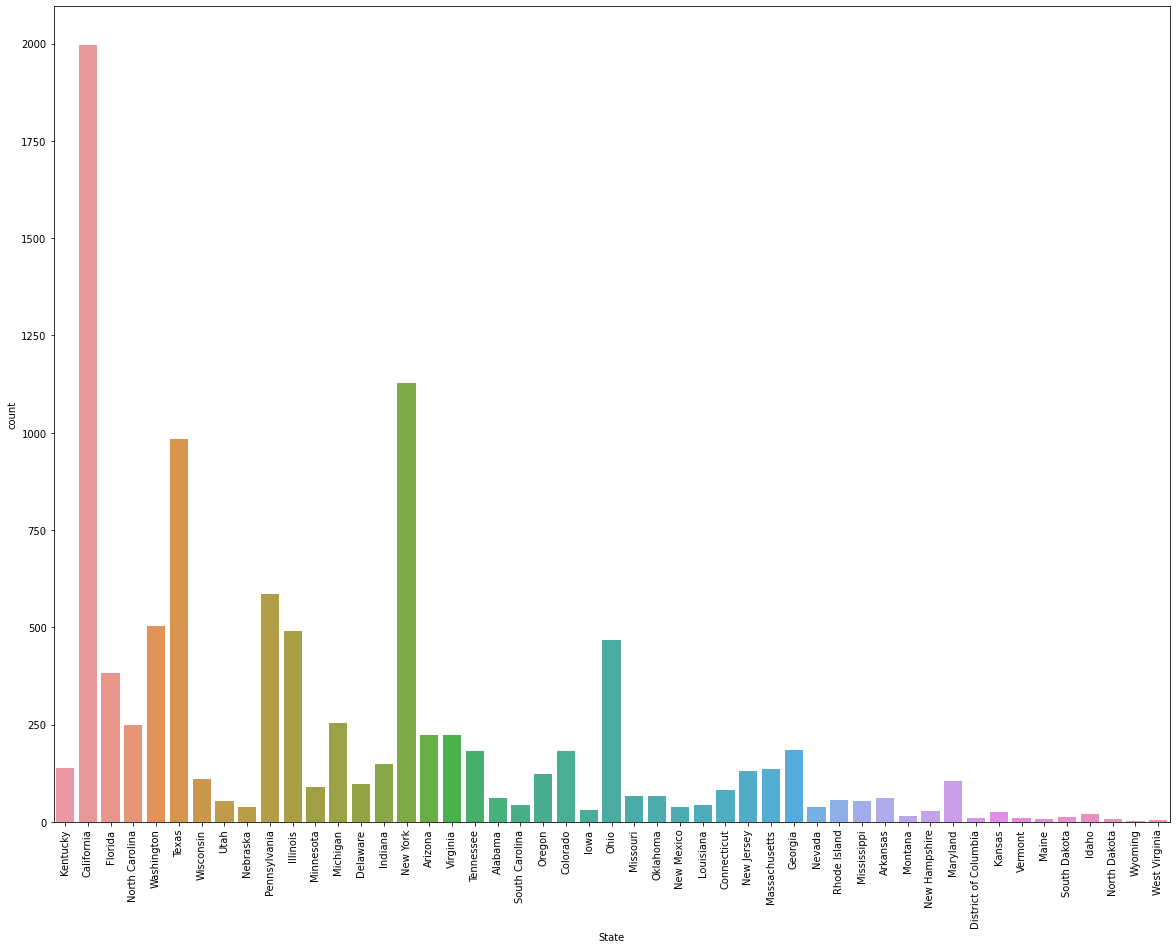

In [16]:
#visualizing the varaibale
plt.figure(figsize=(20,15))
sns.countplot(x="State",data=df)
plt.xticks(rotation=90)
plt.show()

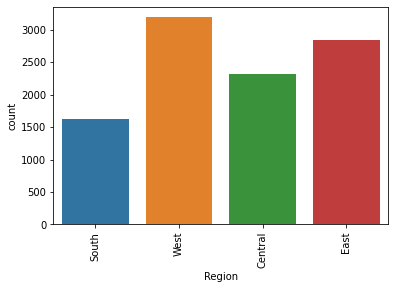

In [17]:
#visualizing the varaibale
sns.countplot(x="Region",data=df)
plt.xticks(rotation=90)
plt.show()


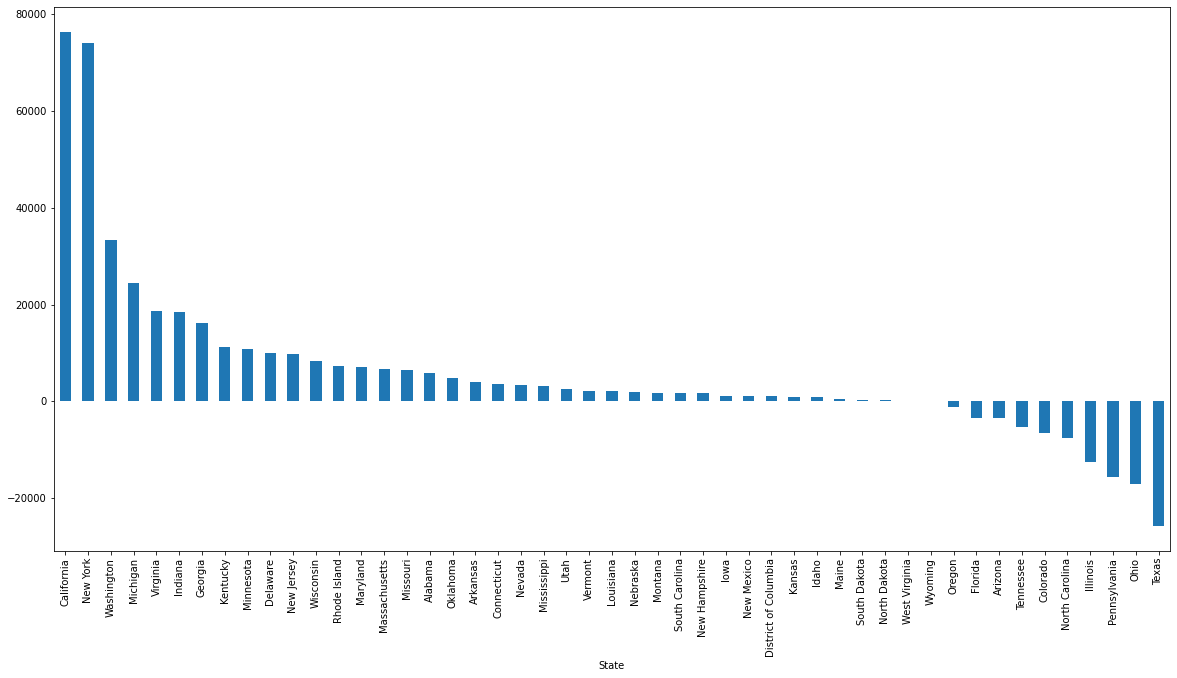

In [18]:
# Comparison of States with Profit, in general share of profit as per States
plt.figure(figsize=(20,10))
df_group=df.groupby(["State"])["Profit"].sum()
df_group.sort_values(ascending=False,inplace=True)
df_group.plot.bar()
plt.show()

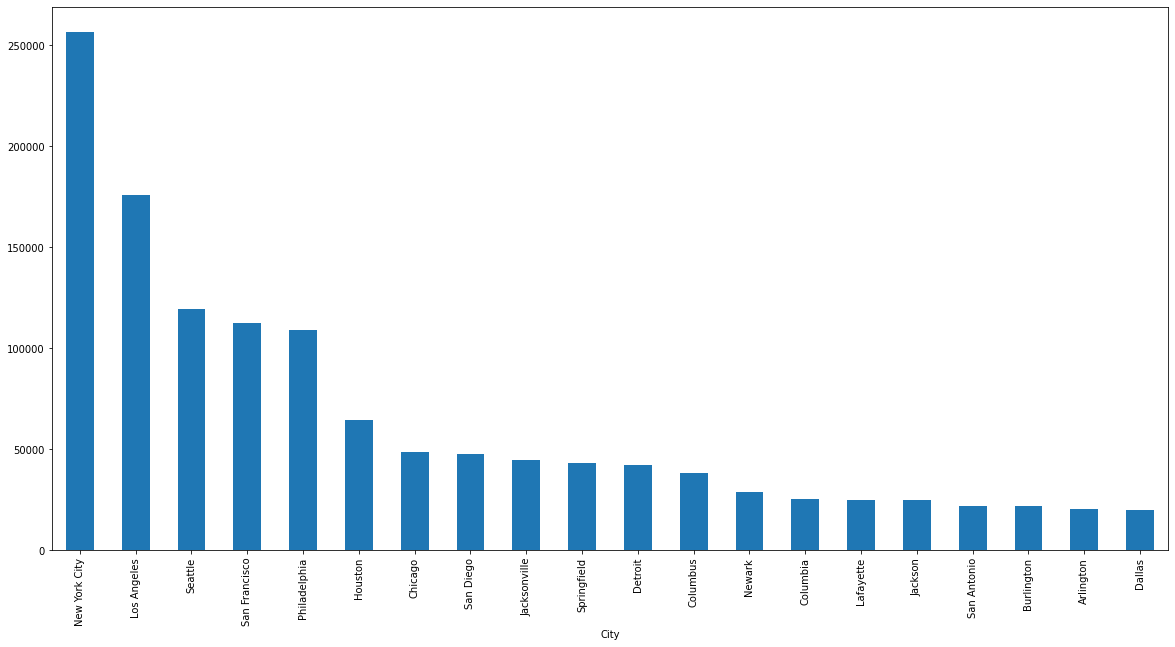

In [19]:
# Sales w.r.t cities
plt.figure(figsize=(20,10))
df3=df.groupby(["City"])["Sales"].sum()
df4=df3[df3>20000]
df4.sort_values(ascending=False,inplace=True)
df4.plot.bar()
plt.show()

C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

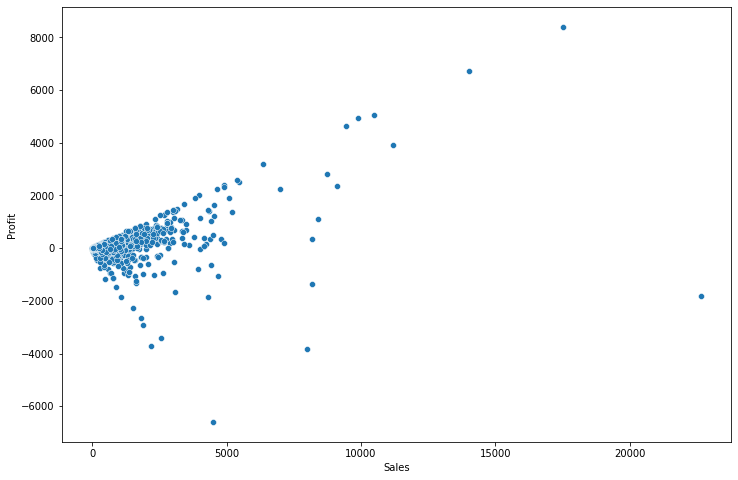

In [20]:
#the relation between the two variable profit and sales 
plt.figure(figsize=(12,8))
sns.scatterplot(df['Sales'],df['Profit'])

C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


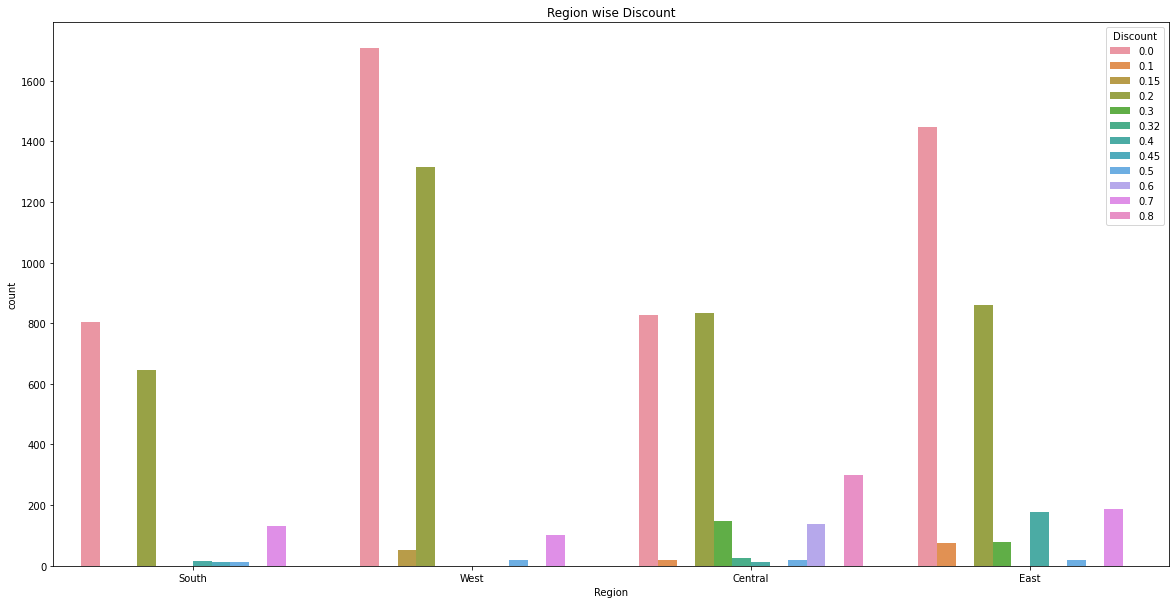

In [21]:
#visualizing the discounts in the region
plt.figure(figsize=(20,10))
sns.countplot("Region",data=df,hue="Discount")
plt.title("Region wise Discount")
plt.show()

<AxesSubplot:ylabel='Profit'>

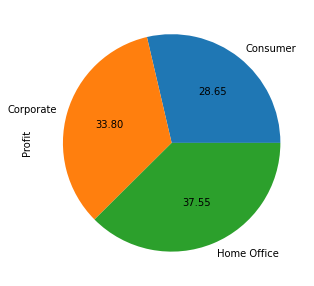

In [22]:
data = df.groupby("Segment")["Profit"].mean()
data.plot.pie(figsize = (5,5), autopct = '%.2f')
# Share of Profit by each Segment

<AxesSubplot:ylabel='Profit'>

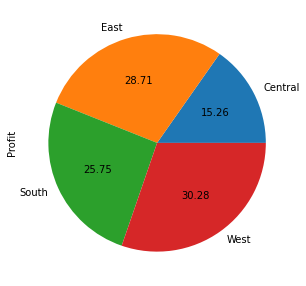

In [23]:
data = df.groupby("Region")["Profit"].mean()
data.plot.pie(figsize = (5,5), autopct = '%.2f')
# Share of Profit by each Region

<AxesSubplot:ylabel='Profit'>

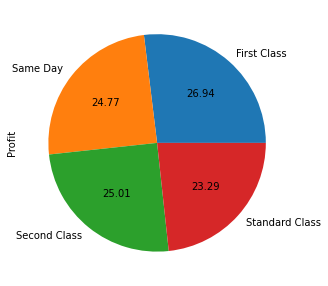

In [24]:
data = df.groupby("Ship Mode")["Profit"].mean()
data.plot.pie(figsize = (5,5), autopct = '%.2f')
# Share of Ship Mode by each Region

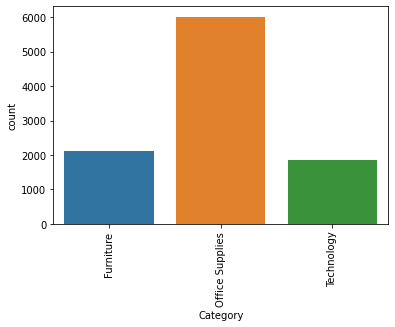

In [34]:
#visualizing the varaibale
sns.countplot(x="Category",data=df)
plt.xticks(rotation=90)
plt.show()

C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


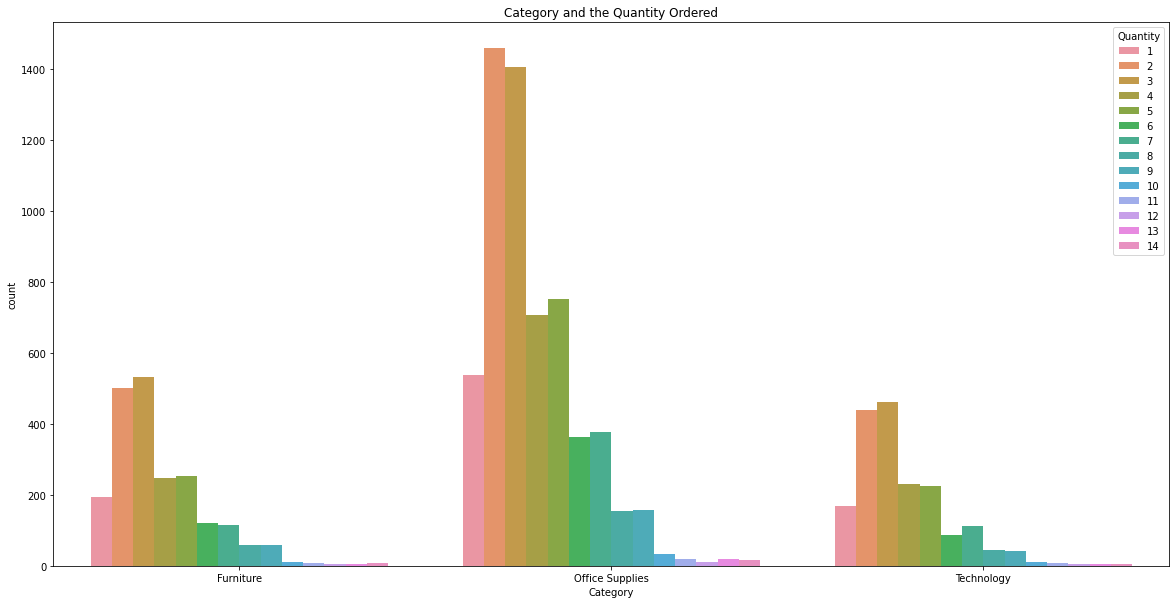

In [27]:
#visualizing region and the quantity ordered from that region
plt.figure(figsize=(20,10))
sns.countplot("Category",data=df,hue="Quantity")
plt.title("Category and the Quantity Ordered")
plt.show()

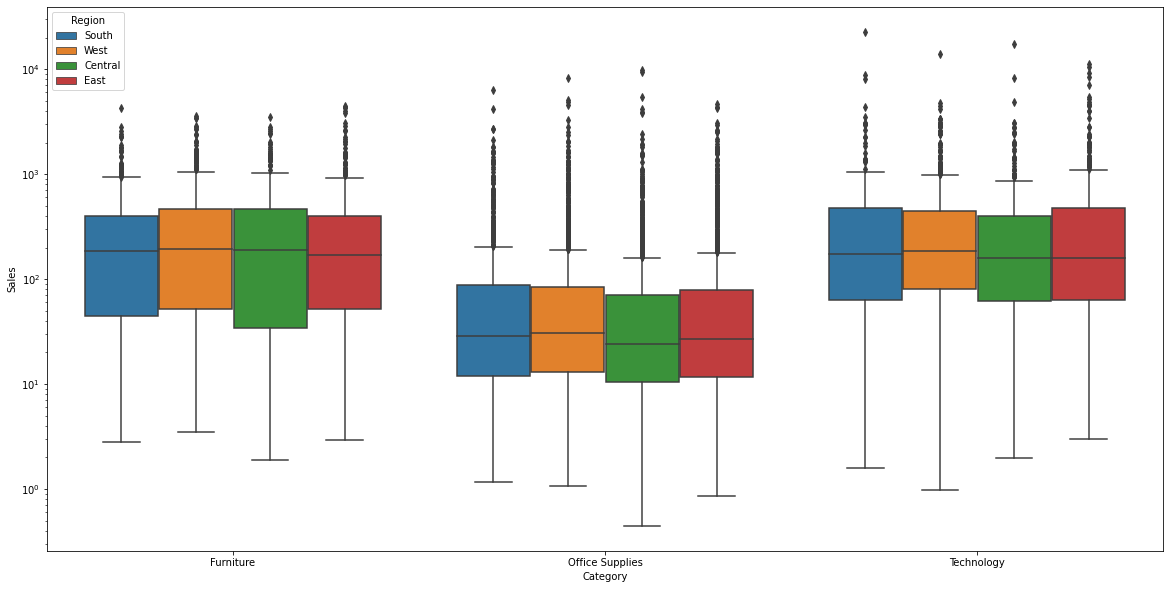

In [31]:
#visualizing the category variable with the sales and region 
plt.figure(figsize = (20, 10))
ax=sns.boxplot(x = 'Category', y = 'Sales', hue = 'Region', data = df)
ax.set_yscale('log')
plt.show()

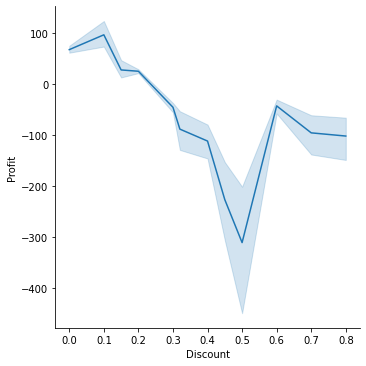

In [40]:
sns.relplot(x = "Discount", y = "Profit", data = df, kind = "line")

# Pandas-Profiling Report

In [1]:
import pandas_profiling

In [4]:
df.profile_report()

# Summary

1. High Correlation between State and Region, Category and Sub-Category
2. 48% records as 0% discount
3. Sales and Profit features are not linearly related, thus a non linear ML model must be chosen
4. NewYork City witnessed maximum Profit
5. California State was the state with maximum Profit.
6. The Home Office Segment was the most profitable segment as compared to Corporate and Consumer Segments
7. Discount and Profit shared a non linear relation
8. The Central Region was very less profitable,an area of concern

Thus Further Decisions and policies can be planned as per the above stats and visualizations